In [32]:
import pandas as pd
import numpy as np
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [33]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv", index_col=0)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

# **FASE 1**

# 1. **Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 

In [34]:
df_loyalty.sample(2)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
136065,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,83015.0,Married,Star,2731.52,Standard,2012,7,NaN,NaN
549751,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,86214.0,Married,Star,2577.32,Standard,2014,7,NaN,NaN


Echamos un primer vistazo a los datos para ver qué tipo de columnas tenemos.

In [35]:
df_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

En este caso aparece "LOYALTY NUMBER" que es el identificador por cliente, nos aparece como index y nos conviene que nos aparezca como columna.

Vamos a pasar el LOYALTY NUMBER a columna:

In [36]:
df_loyalty = df_loyalty.reset_index()

In [37]:
df_loyalty.shape

(16737, 16)

Vemos que en este caso contamos con 16737 filas y 14 columnas

In [38]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Comprobamos que los datos están con el tipo correcto para poder trabajar con ellos y además vemos el numero de nulos que tenemos en cada columna, en este caso el documento no tiene nulos, lo que es un buen comienzo.

In [39]:
df_loyalty.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

Por comodidad vamos a quitar los espacios de los nombres de las columnas 

In [40]:
df_loyalty.columns = df_loyalty.columns.str.replace(' ', '')

# 2. **Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [41]:
df_loyalty.isnull().mean().round(2) * 100

LoyaltyNumber         0.0
Country               0.0
Province              0.0
City                  0.0
PostalCode            0.0
Gender                0.0
Education             0.0
Salary               25.0
MaritalStatus         0.0
LoyaltyCard           0.0
CLV                   0.0
EnrollmentType        0.0
EnrollmentYear        0.0
EnrollmentMonth       0.0
CancellationYear     88.0
CancellationMonth    88.0
dtype: float64

*No hay nulos en esta tabla*

In [42]:
total_duplicadas_loyalty=df_loyalty.duplicated().sum()
print(f"Total de filas duplicadas: {total_duplicadas_loyalty}")

Total de filas duplicadas: 0


Observamos que no hay filas duplicadas pero si que hay un 25% de nulos n la columna "Salary", por lo que procedemos a su tratamiento. En este caso vamos a rellenarlos con "Unknown".

In [43]:
df_loyalty['Salary'] = df_loyalty['Salary'].fillna('Unknown')

Borramos las dos ultimas columnas ('CancellationYear', 'CancellationMonth'), tienen un 87% de nulos, aunque tambien se puede interpretar como que están actualmente activas esas tarjetas, en esta ocasion las borraremos.

In [44]:
df_loyalty.drop(['CancellationYear', 'CancellationMonth'], axis=1, inplace=True)

Tras eliminar los duplicados, tratar los nulos de "salary" y eliminar las ultimas  finalizamos el tratamiento del documento.


Pasamos la funcion de #EDA para darle un último vistazo y comprobar que todo está bien

In [48]:

def eda(df_loyalty):
    print("========== RESUMEN GENERAL ==========")
    print(f"Filas x Columnas (shape): {df_loyalty.shape}")
    print("\nColumnas:")
    print(df_loyalty.columns.tolist())

    print("\nDtypes:")
    print(df_loyalty.dtypes)

    print("\nNulos por columna:")
    print(df_loyalty.isnull().sum())

    print("\n========== DESCRIBE NUMÉRICO ==========")
    print(df_loyalty.describe().T)

    print("\n========== DESCRIBE CATEGÓRICO (object/category) ==========")
    print(df_loyalty.describe(include=["O"]).T)

    print("\n========== HEAD ==========")
    print(df_loyalty.head(2))
    print("\n========== TAIL ==========")
    print(df_loyalty.tail(2))
    print("\n========== SAMPLE ==========")
    print(df_loyalty.sample(2))
    print("\n========== VALUE COUNTS (por columna categórica) ==========")
    col_categoricas = df_loyalty.select_dtypes(include=["object", "category"]).columns.tolist()

# Iterar sobre cada columna y mostrar top 3
    for col in col_categoricas:
        print(f"\nColumna: {col}")
        print(df_loyalty[col].value_counts().head(3))

    print("\n========== DUPLICADOS ==========")

    print(df_loyalty[df_loyalty.duplicated()])
    if df_loyalty.duplicated().sum() > 0:
        print("Borrando duplicados:")
        print(df_loyalty.dropduplicates())

    print("\n========== HISTOGRAMAS NUMÉRICOS ==========")

    df_loyalty.hist(bins=20, figsize=(25,25))
    plt.show()

    print("\n========== BARRAS CATEGÓRICAS==========")
    for c in col_categoricas:
         plt.figure(figsize=(10, 10))
         sns.countplot(x=c, data=df_loyalty, palette='Set2')
         plt.xticks(rotation=90)
         plt.xlabel(f"Countplot de {c}")
         plt.show()
    else:
        print("\n No hay variables categóricas para graficar.")

    print("\n EDA completado con éxito.")

========== RESUMEN GENERAL ==========
Filas x Columnas (shape): (16737, 14)

Columnas:
['LoyaltyNumber', 'Country', 'Province', 'City', 'PostalCode', 'Gender', 'Education', 'Salary', 'MaritalStatus', 'LoyaltyCard', 'CLV', 'EnrollmentType', 'EnrollmentYear', 'EnrollmentMonth']

Dtypes:
LoyaltyNumber        int64
Country             object
Province            object
City                object
PostalCode          object
Gender              object
Education           object
Salary              object
MaritalStatus       object
LoyaltyCard         object
CLV                float64
EnrollmentType      object
EnrollmentYear       int64
EnrollmentMonth      int64
dtype: object

Nulos por columna:
LoyaltyNumber      0
Country            0
Province           0
City               0
PostalCode         0
Gender             0
Education          0
Salary             0
MaritalStatus      0
LoyaltyCard        0
CLV                0
EnrollmentType     0
EnrollmentYear     0
EnrollmentMonth    0
dtype: i

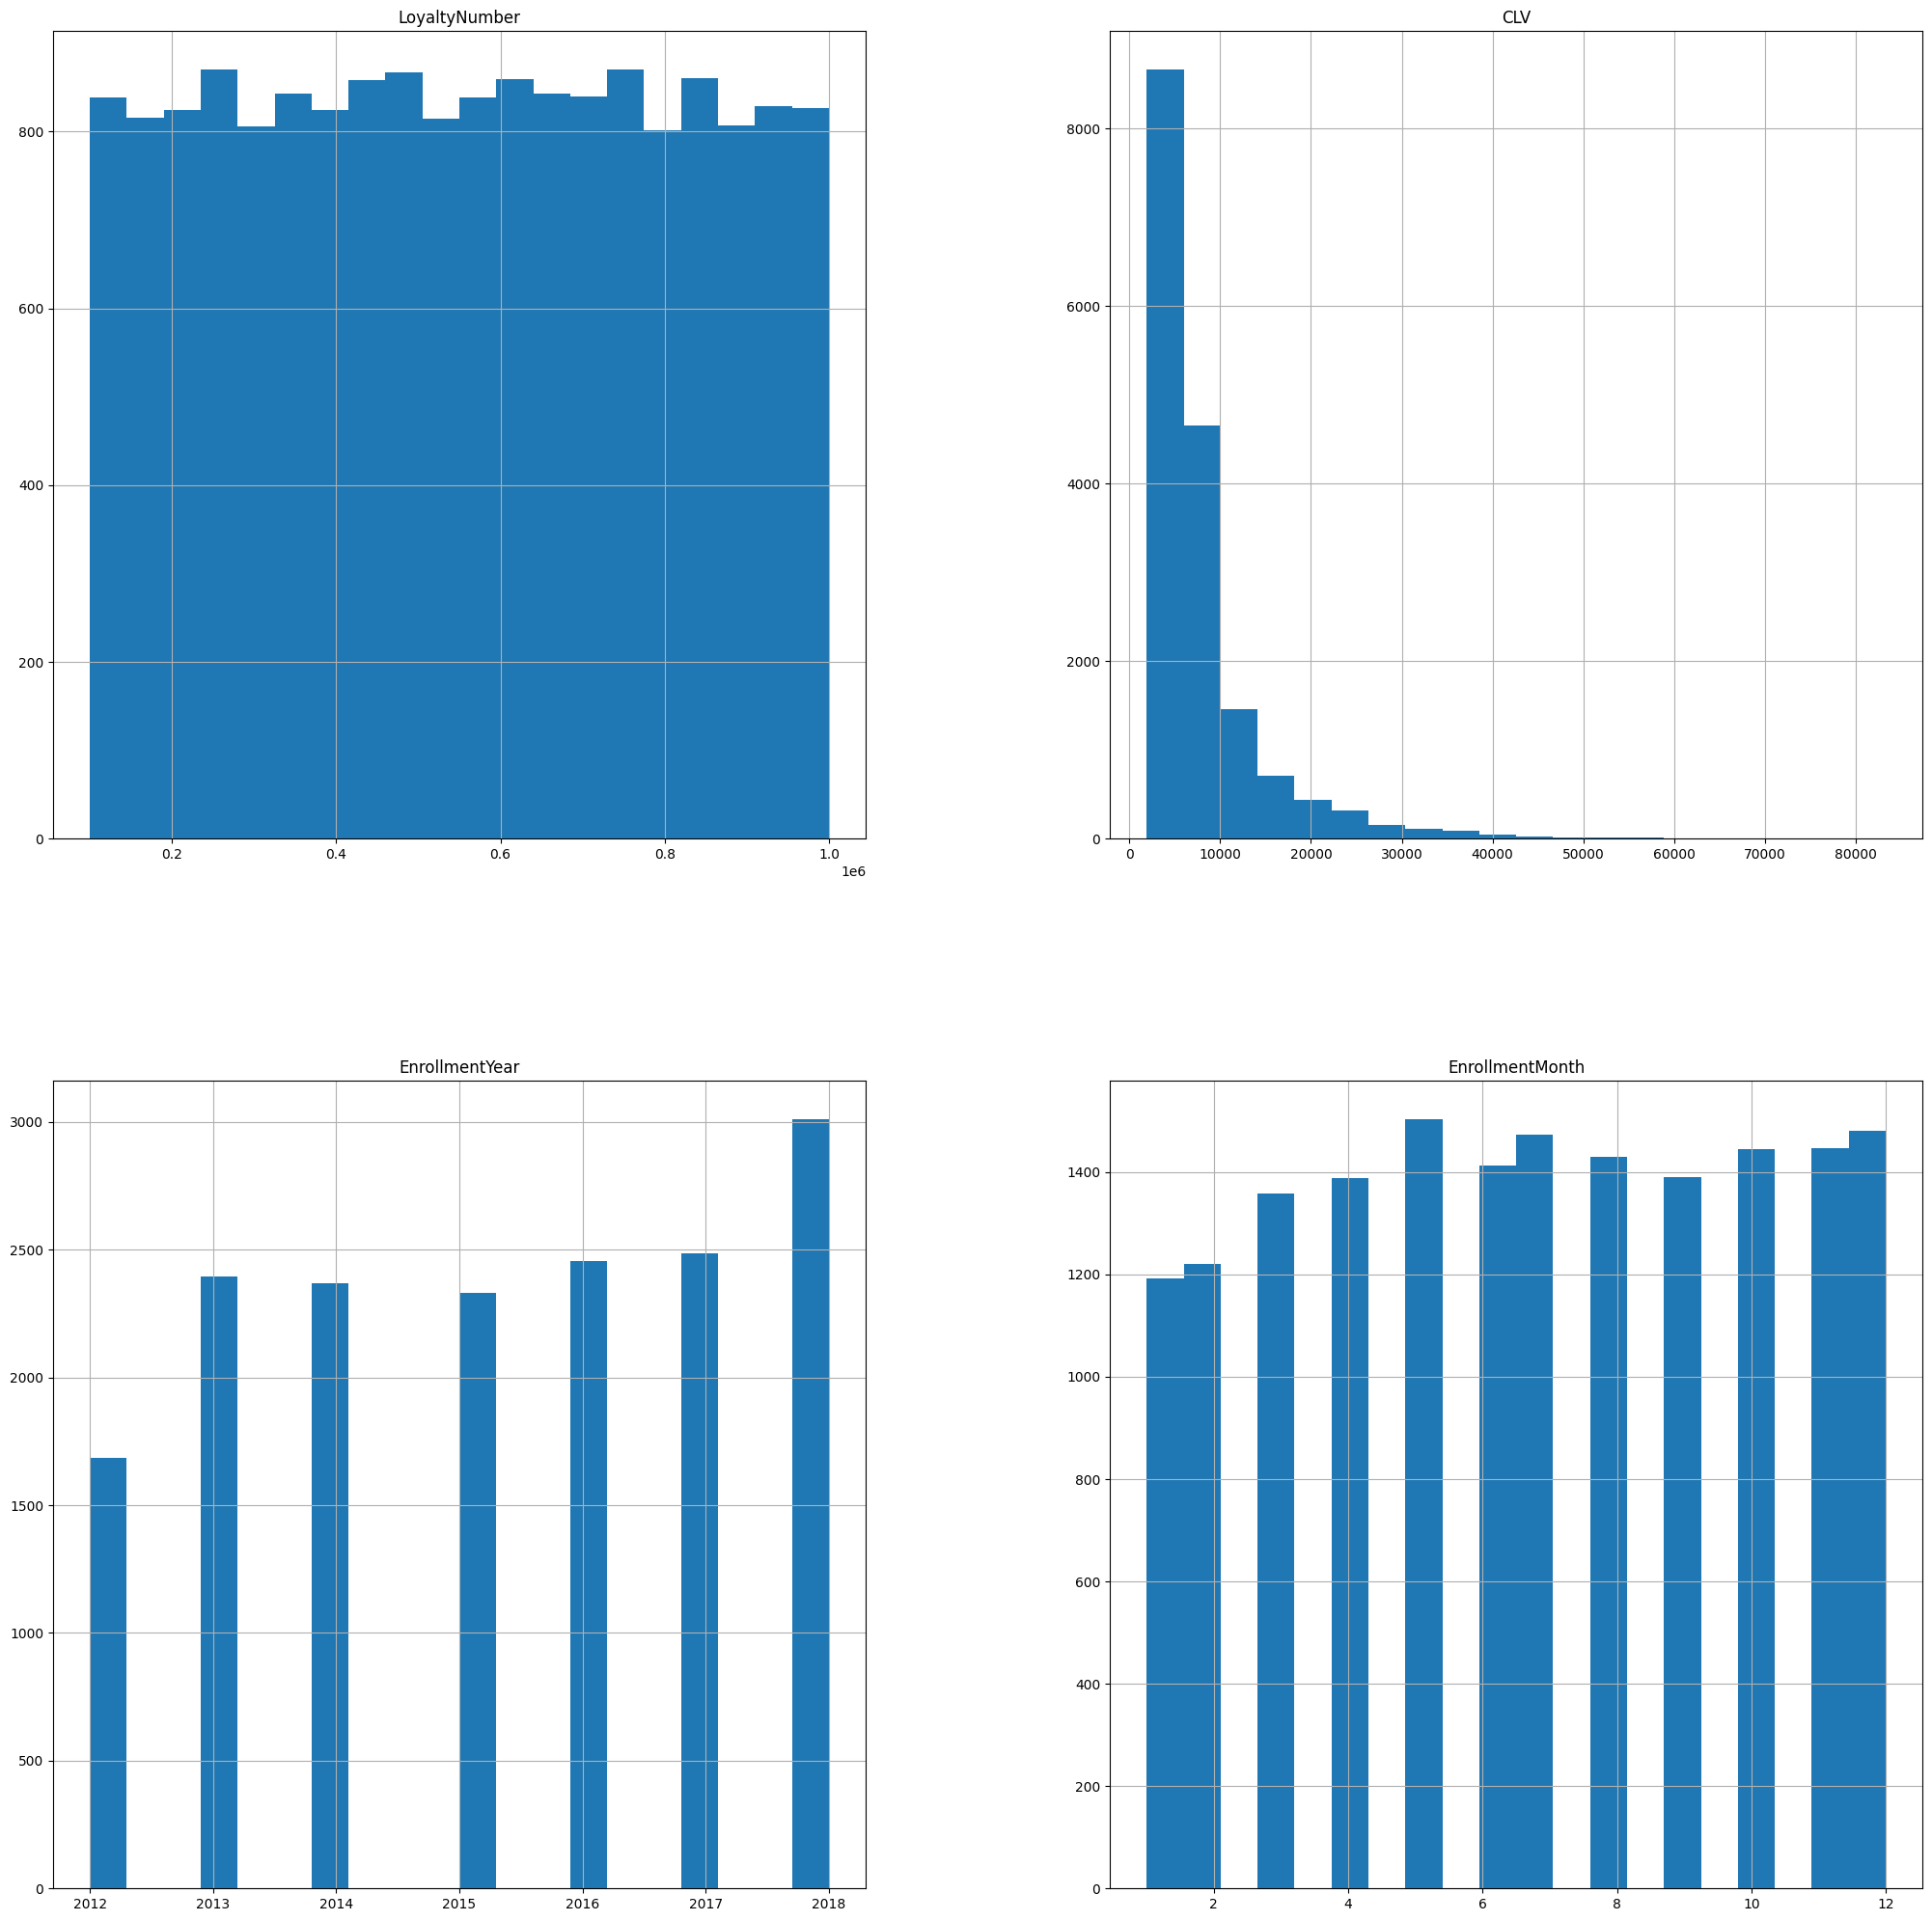


========== BARRAS CATEGÓRICAS==========


C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


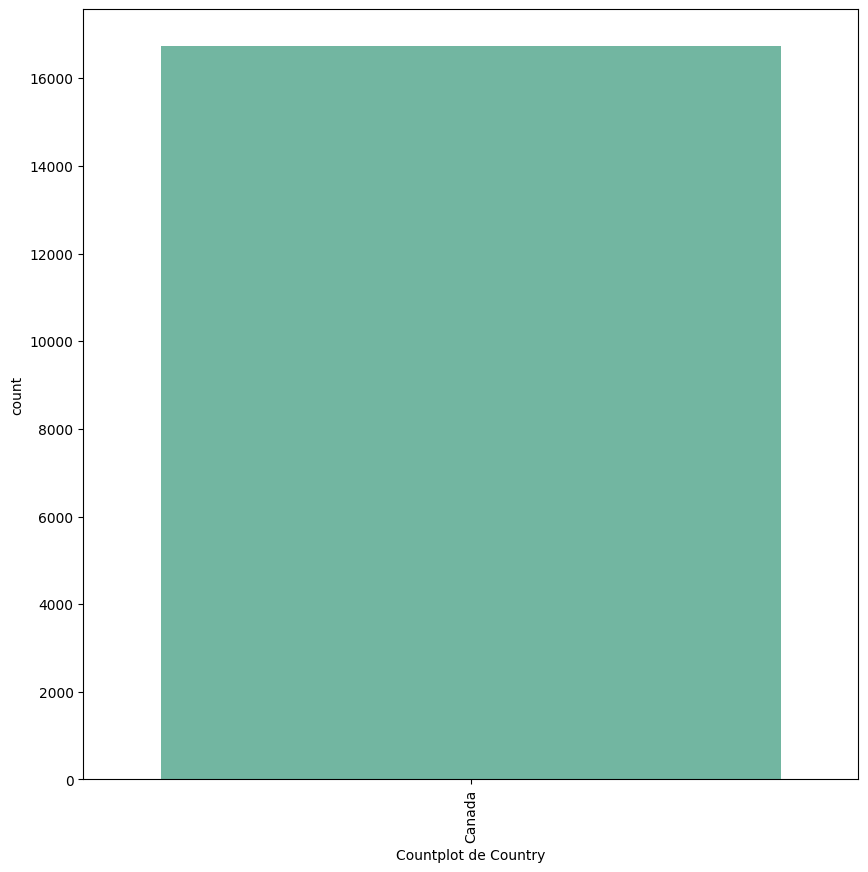

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


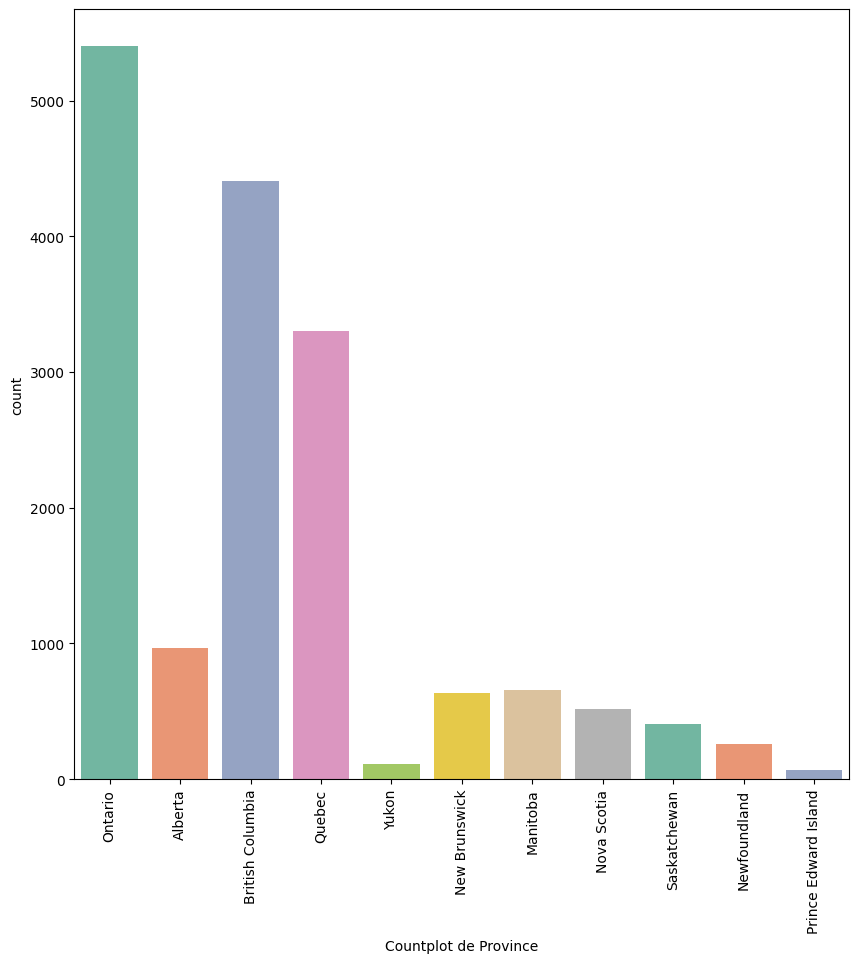

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


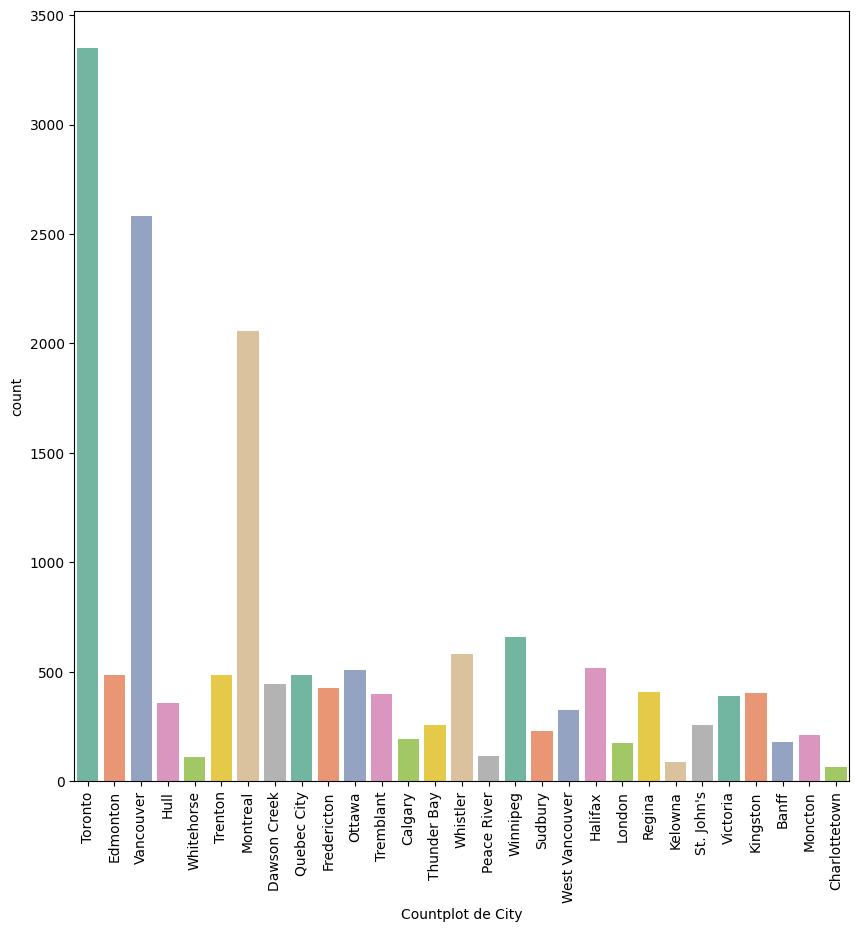

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


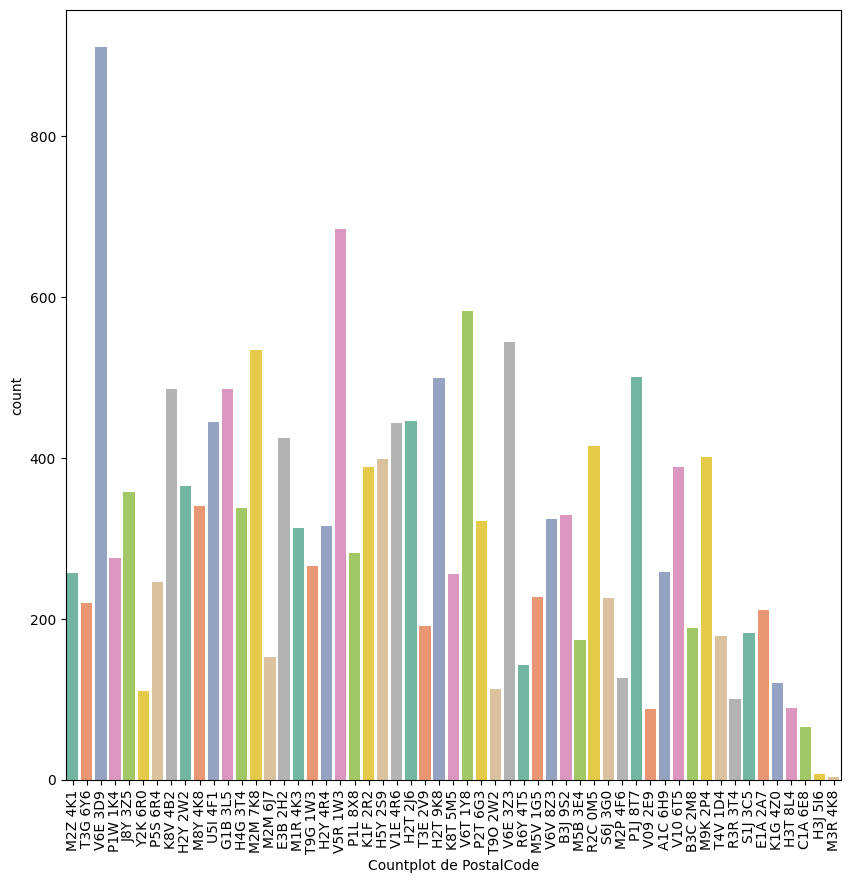

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


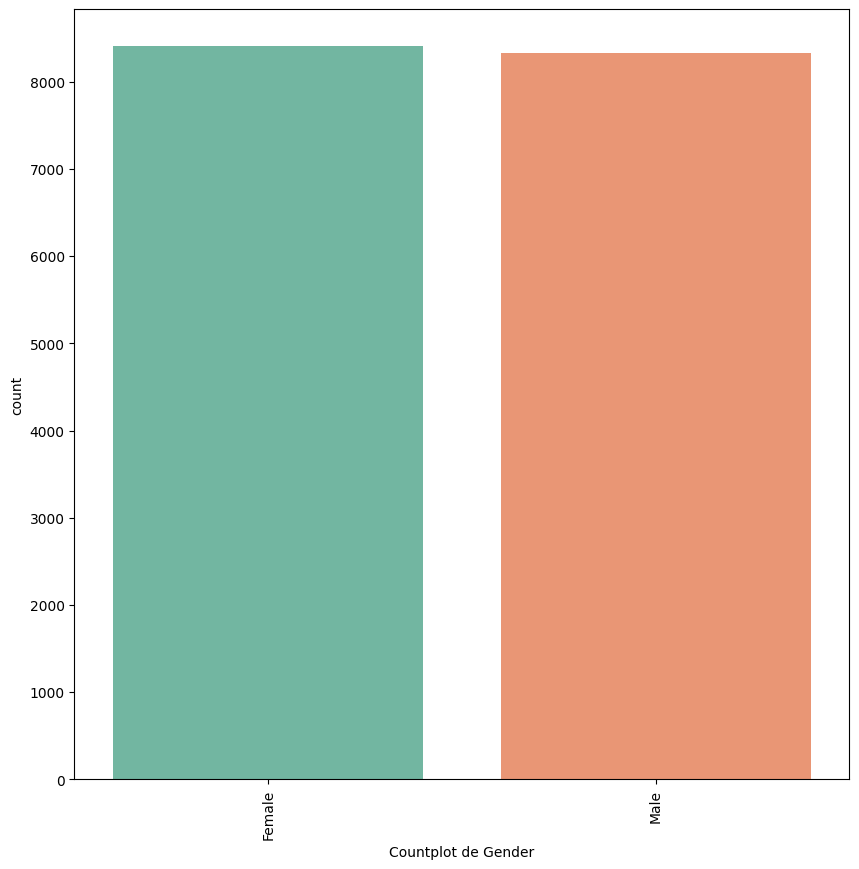

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


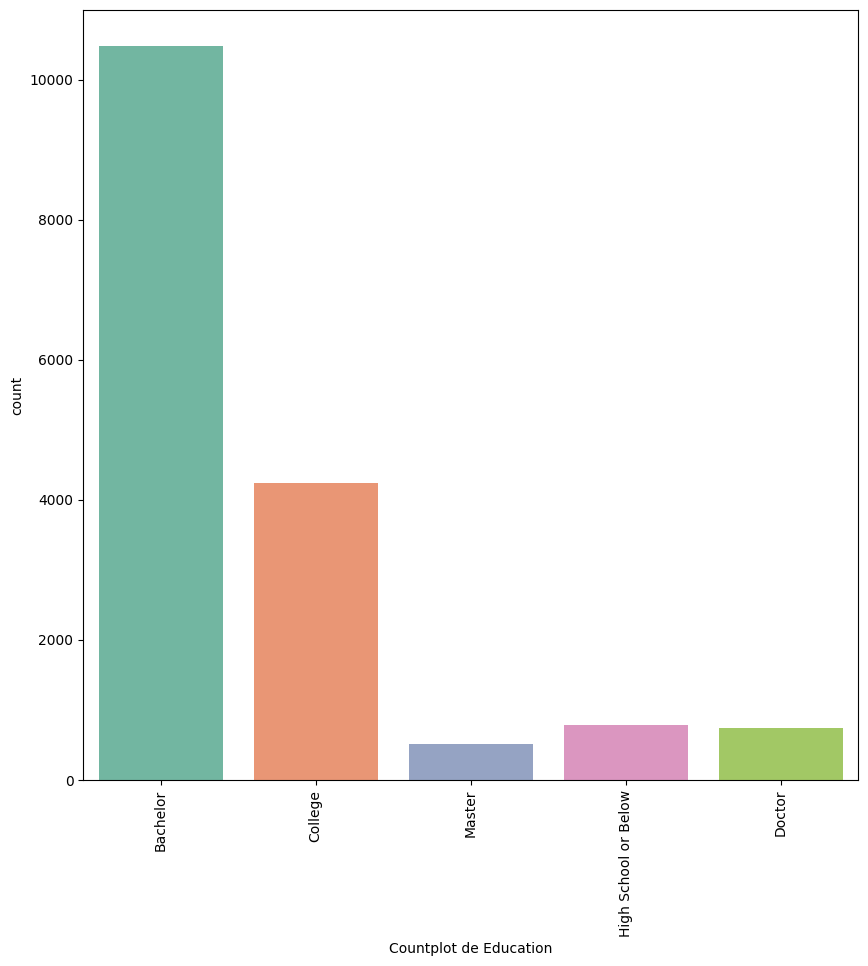

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


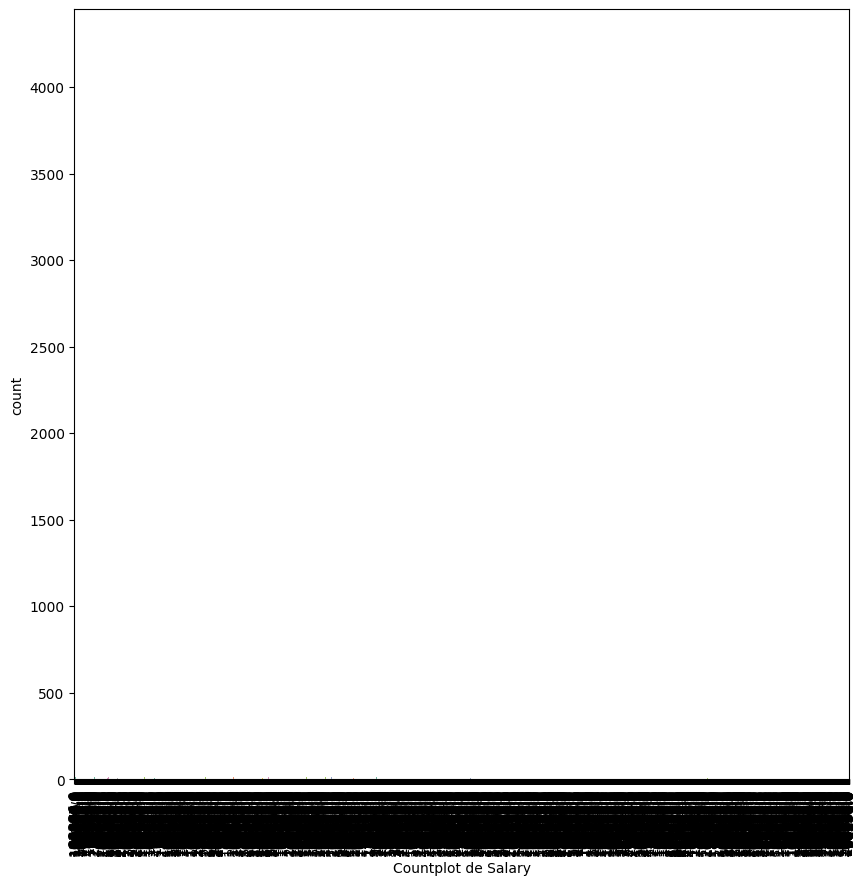

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


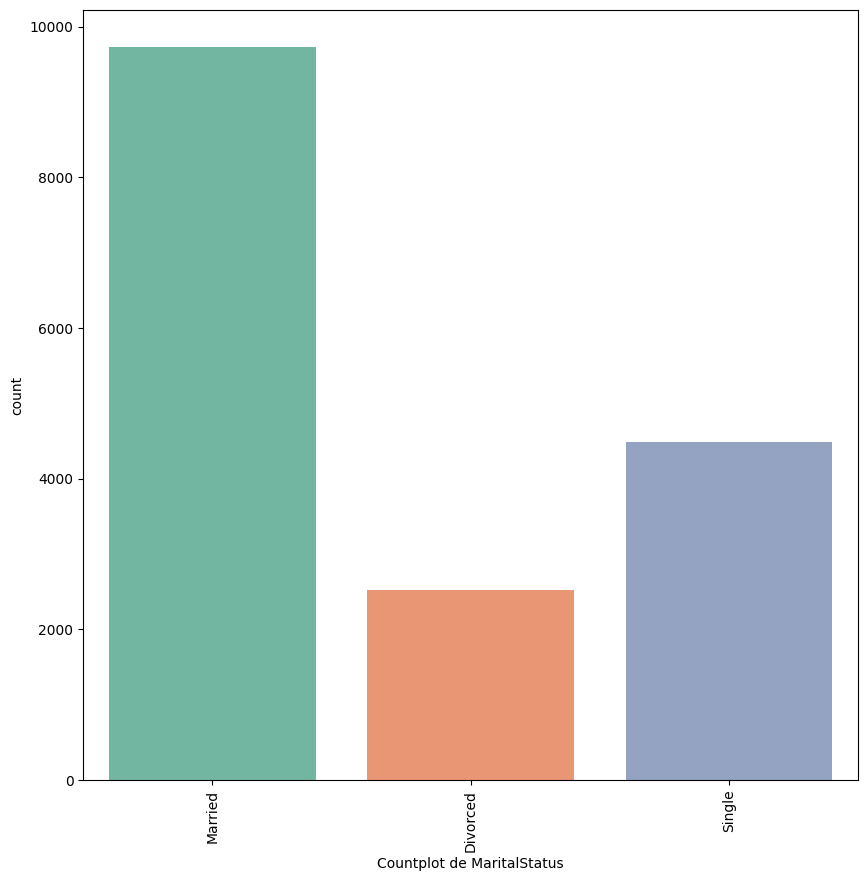

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


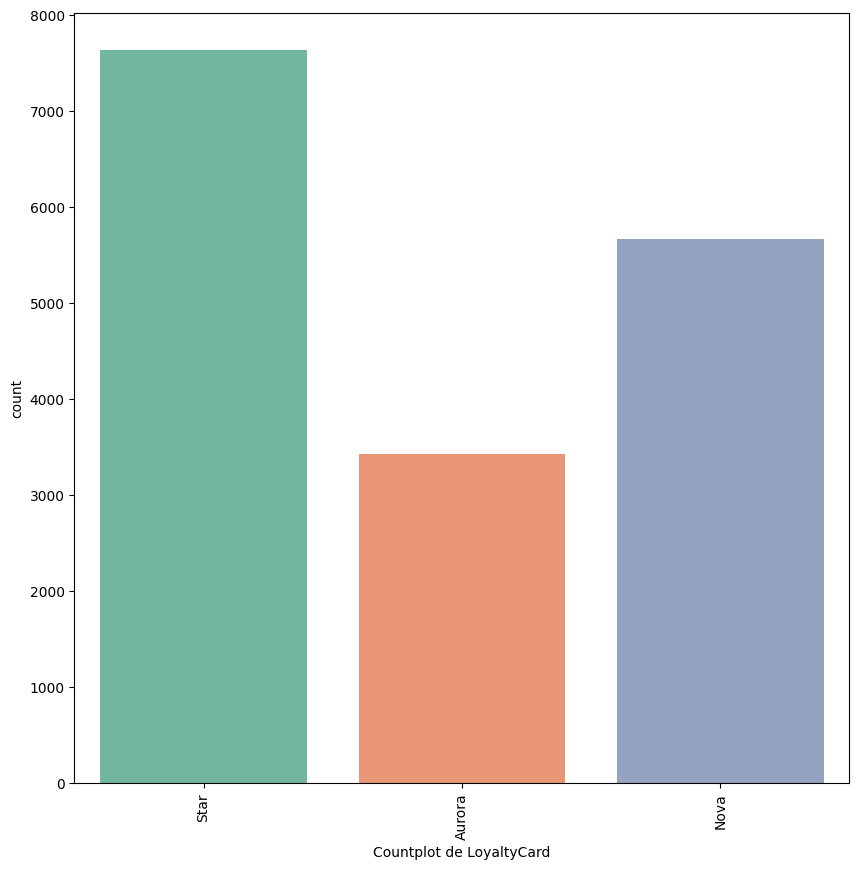

C:\Users\elena\AppData\Local\Temp\ipykernel_17512\3654106070.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_loyalty, palette='Set2')


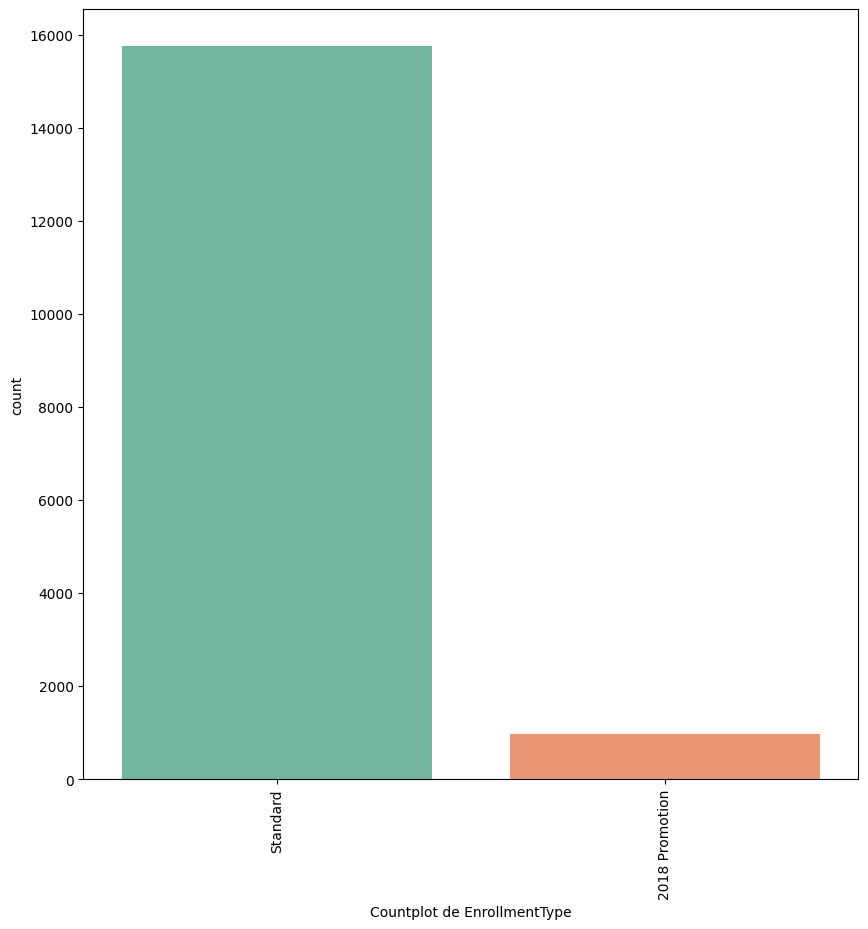


 No hay variables categóricas para graficar.

 EDA completado con éxito.


In [49]:
eda(df_loyalty)

A continuación procedemos a guardar el CSV tratado:

In [50]:
df_loyalty.to_csv('df_loyalty_clean.csv', index=False)